In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn import pipeline
from sklearn.model_selection import train_test_split

In [97]:
data1 = pd.read_csv(r"C:\Users\97798\Desktop\archive\laptop_data.csv")

In [98]:
data1

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [6]:
data.drop('Unnamed: 0', axis =1,inplace = True)

In [12]:
data.Cpu.unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [21]:
def classify_data(cpu_name):
    if 'Intel Core i3' in cpu_name:
        return 'Intel Core i3'
    elif 'Intel Core i5' in cpu_name:
        return 'Intel Core i5'
    elif 'Intel Core i7' in cpu_name:
        return 'Intel Core i7'
    elif 'AMD' in cpu_name:
        return 'AMD'
    else:
        return 'Others'

In [24]:
data.Cpu = data.Cpu.apply(classify_data)

In [26]:
data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Others,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [28]:
data.Gpu.unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [29]:
def classify_gpu(gpu_name):
    manufacturers = ['Intel', 'AMD', 'Nvidia', 'ARM']  # Add more if needed
    for manufacturer in manufacturers:
        if manufacturer in gpu_name:
            return manufacturer
    return 'Others'


In [30]:
data.Gpu = data.Gpu.apply(classify_gpu)

In [37]:
data.Memory.unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [38]:
import pandas as pd
import re

data1 = data.Memory
# Create a DataFrame from the array
df = pd.DataFrame({'data': data1})

# Extract the drive type and size
df['Drive Type'] = df['data'].str.extract(r'(SSD|HDD|Flash Storage|Hybrid)', flags=re.IGNORECASE)
df['Size'] = df['data'].str.extract(r'(\d+\.\d+|\d+)GB', flags=re.IGNORECASE).fillna('1')

# Store the actual size values in separate columns
df['Size_Flash Storage'] = df[df['Drive Type'] == 'Flash Storage']['Size']
df['Size_HDD'] = df[df['Drive Type'] == 'HDD']['Size']
df['Size_Hybrid'] = df[df['Drive Type'] == 'Hybrid']['Size']
df['Size_SSD'] = df[df['Drive Type'] == 'SSD']['Size']

# Display the DataFrame
df = df[['Size_Flash Storage','Size_HDD','Size_Hybrid','Size_SSD']]

In [39]:
df

,Size_Flash Storage,Size_HDD,Size_Hybrid,Size_SSD
0,NaN,NaN,NaN,128
1,128,NaN,NaN,NaN
2,NaN,NaN,NaN,256
3,NaN,NaN,NaN,512
4,NaN,NaN,NaN,256
...,...,...,...,...
1298,NaN,NaN,NaN,128
1299,NaN,NaN,NaN,512
1300,64,NaN,NaN,NaN
1301,NaN,1,NaN,NaN


In [40]:
data = data.loc[:, ~data.columns.duplicated()]


In [56]:
data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,Size_Flash Storage,Size_HDD,Size_Hybrid,Size_SSD
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8GB,Intel,macOS,1.37kg,71378.6832,NaN,NaN,NaN,128
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5,8GB,Intel,macOS,1.34kg,47895.5232,128,NaN,NaN,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5,8GB,Intel,No OS,1.86kg,30636.0000,NaN,NaN,NaN,256
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16GB,AMD,macOS,1.83kg,135195.3360,NaN,NaN,NaN,512
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8GB,Intel,macOS,1.37kg,96095.8080,NaN,NaN,NaN,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7,4GB,Intel,Windows 10,1.8kg,33992.6400,NaN,NaN,NaN,128
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7,16GB,Intel,Windows 10,1.3kg,79866.7200,NaN,NaN,NaN,512
1300,Lenovo,Notebook,14.0,1366x768,Others,2GB,Intel,Windows 10,1.5kg,12201.1200,64,NaN,NaN,0
1301,HP,Notebook,15.6,1366x768,Intel Core i7,6GB,AMD,Windows 10,2.19kg,40705.9200,NaN,1,NaN,0


In [48]:
data = pd.concat([data, df], axis =1)

In [51]:
data.drop(['Memory'], axis =1, inplace = True)

In [59]:
data['Size_Flash Storage'] = data['Size_Flash Storage'].replace(np.nan, 0)


In [60]:
data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,Size_Flash Storage,Size_HDD,Size_Hybrid,Size_SSD
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8GB,Intel,macOS,1.37kg,71378.6832,0,0,0,128
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5,8GB,Intel,macOS,1.34kg,47895.5232,128,0,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5,8GB,Intel,No OS,1.86kg,30636.0000,0,0,0,256
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16GB,AMD,macOS,1.83kg,135195.3360,0,0,0,512
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8GB,Intel,macOS,1.37kg,96095.8080,0,0,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7,4GB,Intel,Windows 10,1.8kg,33992.6400,0,0,0,128
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7,16GB,Intel,Windows 10,1.3kg,79866.7200,0,0,0,512
1300,Lenovo,Notebook,14.0,1366x768,Others,2GB,Intel,Windows 10,1.5kg,12201.1200,64,0,0,0
1301,HP,Notebook,15.6,1366x768,Intel Core i7,6GB,AMD,Windows 10,2.19kg,40705.9200,0,1,0,0


In [61]:
new = data.ScreenResolution.str.split('x', n=1, expand = True)


In [62]:
data['xres'] = new[0]
data['yres'] = new[1]

In [65]:
import re
import pandas as pd

# Assuming `data` is your DataFrame

data['xres'] = data['xres'].str.replace(',', '')  # Remove commas

def extract_numbers(string):
    extracted_numbers = re.findall(r'\d+', string)
    return extracted_numbers[0] if extracted_numbers else None

data['xres'] = data['xres'].apply(extract_numbers)  # Extract numbers

print(data['xres'])


0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: xres, Length: 1303, dtype: object


In [66]:
data.yres = data.yres.astype('int')


In [68]:
data.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Gpu', 'OpSys', 'Weight', 'Price', 'Size_Flash Storage', 'Size_HDD',
       'Size_Hybrid', 'Size_SSD', 'xres', 'yres'],
      dtype='object')

In [81]:
import math
data['ppi'] = data.apply(lambda row: math.sqrt(row['xres']**2 + row['yres']**2) / row['Inches'], axis=1)


In [74]:
data.xres=data.xres.astype(float)

In [79]:
data.drop('ScreenResolution', axis =1, inplace=True)

In [80]:
data

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,Size_Flash Storage,Size_HDD,Size_Hybrid,Size_SSD,xres,yres
0,Apple,Ultrabook,13.3,Intel Core i5,8GB,Intel,macOS,1.37kg,71378.6832,0,0,0,128,2560.0,1600
1,Apple,Ultrabook,13.3,Intel Core i5,8GB,Intel,macOS,1.34kg,47895.5232,128,0,0,0,1440.0,900
2,HP,Notebook,15.6,Intel Core i5,8GB,Intel,No OS,1.86kg,30636.0000,0,0,0,256,1920.0,1080
3,Apple,Ultrabook,15.4,Intel Core i7,16GB,AMD,macOS,1.83kg,135195.3360,0,0,0,512,2880.0,1800
4,Apple,Ultrabook,13.3,Intel Core i5,8GB,Intel,macOS,1.37kg,96095.8080,0,0,0,256,2560.0,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7,4GB,Intel,Windows 10,1.8kg,33992.6400,0,0,0,128,1920.0,1080
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7,16GB,Intel,Windows 10,1.3kg,79866.7200,0,0,0,512,3200.0,1800
1300,Lenovo,Notebook,14.0,Others,2GB,Intel,Windows 10,1.5kg,12201.1200,64,0,0,0,1366.0,768
1301,HP,Notebook,15.6,Intel Core i7,6GB,AMD,Windows 10,2.19kg,40705.9200,0,1,0,0,1366.0,768


In [83]:
data.drop(['xres', 'yres'], axis =1,inplace=True)

In [84]:
data


,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,Size_Flash Storage,Size_HDD,Size_Hybrid,Size_SSD,ppi
0,Apple,Ultrabook,13.3,Intel Core i5,8GB,Intel,macOS,1.37kg,71378.6832,0,0,0,128,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5,8GB,Intel,macOS,1.34kg,47895.5232,128,0,0,0,127.677940
2,HP,Notebook,15.6,Intel Core i5,8GB,Intel,No OS,1.86kg,30636.0000,0,0,0,256,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7,16GB,AMD,macOS,1.83kg,135195.3360,0,0,0,512,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5,8GB,Intel,macOS,1.37kg,96095.8080,0,0,0,256,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7,4GB,Intel,Windows 10,1.8kg,33992.6400,0,0,0,128,157.350512
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7,16GB,Intel,Windows 10,1.3kg,79866.7200,0,0,0,512,276.053530
1300,Lenovo,Notebook,14.0,Others,2GB,Intel,Windows 10,1.5kg,12201.1200,64,0,0,0,111.935204
1301,HP,Notebook,15.6,Intel Core i7,6GB,AMD,Windows 10,2.19kg,40705.9200,0,1,0,0,100.454670


In [85]:
data.Ram = data.Ram.str.replace('GB','')


In [86]:
data.Ram =data.Ram.astype('int32')


In [87]:
data.Weight = data.Weight.str.replace('kg','')


In [90]:
data.Weight =data.Weight.astype('float')


In [91]:
data

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,Size_Flash Storage,Size_HDD,Size_Hybrid,Size_SSD,ppi
0,Apple,Ultrabook,13.3,Intel Core i5,8,Intel,macOS,1.37,71378.6832,0,0,0,128,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5,8,Intel,macOS,1.34,47895.5232,128,0,0,0,127.677940
2,HP,Notebook,15.6,Intel Core i5,8,Intel,No OS,1.86,30636.0000,0,0,0,256,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7,16,AMD,macOS,1.83,135195.3360,0,0,0,512,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5,8,Intel,macOS,1.37,96095.8080,0,0,0,256,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7,4,Intel,Windows 10,1.80,33992.6400,0,0,0,128,157.350512
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7,16,Intel,Windows 10,1.30,79866.7200,0,0,0,512,276.053530
1300,Lenovo,Notebook,14.0,Others,2,Intel,Windows 10,1.50,12201.1200,64,0,0,0,111.935204
1301,HP,Notebook,15.6,Intel Core i7,6,AMD,Windows 10,2.19,40705.9200,0,1,0,0,100.454670


In [94]:
X = data.drop(['Price'], axis =1)

KeyError: "['Price'] not found in axis"

In [95]:
data

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Size_Flash Storage,Size_HDD,Size_Hybrid,Size_SSD,ppi
0,Apple,Ultrabook,13.3,Intel Core i5,8,Intel,macOS,1.37,0,0,0,128,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5,8,Intel,macOS,1.34,128,0,0,0,127.677940
2,HP,Notebook,15.6,Intel Core i5,8,Intel,No OS,1.86,0,0,0,256,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7,16,AMD,macOS,1.83,0,0,0,512,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5,8,Intel,macOS,1.37,0,0,0,256,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7,4,Intel,Windows 10,1.80,0,0,0,128,157.350512
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7,16,Intel,Windows 10,1.30,0,0,0,512,276.053530
1300,Lenovo,Notebook,14.0,Others,2,Intel,Windows 10,1.50,64,0,0,0,111.935204
1301,HP,Notebook,15.6,Intel Core i7,6,AMD,Windows 10,2.19,0,1,0,0,100.454670


In [99]:
X = data

In [100]:
X

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Size_Flash Storage,Size_HDD,Size_Hybrid,Size_SSD,ppi
0,Apple,Ultrabook,13.3,Intel Core i5,8,Intel,macOS,1.37,0,0,0,128,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5,8,Intel,macOS,1.34,128,0,0,0,127.677940
2,HP,Notebook,15.6,Intel Core i5,8,Intel,No OS,1.86,0,0,0,256,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7,16,AMD,macOS,1.83,0,0,0,512,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5,8,Intel,macOS,1.37,0,0,0,256,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7,4,Intel,Windows 10,1.80,0,0,0,128,157.350512
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7,16,Intel,Windows 10,1.30,0,0,0,512,276.053530
1300,Lenovo,Notebook,14.0,Others,2,Intel,Windows 10,1.50,64,0,0,0,111.935204
1301,HP,Notebook,15.6,Intel Core i7,6,AMD,Windows 10,2.19,0,1,0,0,100.454670


In [101]:
y = data1.Price

In [102]:
y

0        71378.6832
1        47895.5232
2        30636.0000
3       135195.3360
4        96095.8080
           ...     
1298     33992.6400
1299     79866.7200
1300     12201.1200
1301     40705.9200
1302     19660.3200
Name: Price, Length: 1303, dtype: float64

In [105]:
X_train , X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

In [106]:
X_train

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Size_Flash Storage,Size_HDD,Size_Hybrid,Size_SSD,ppi
81,Apple,Ultrabook,12.0,Intel Core i5,8,Intel,macOS,0.920,0,0,0,512,226.415547
254,Acer,Notebook,17.3,Intel Core i3,4,Nvidia,Windows 10,3.000,0,0,0,256,127.335675
1237,Dell,Notebook,15.6,Intel Core i5,4,Intel,Windows 7,2.240,0,500,0,0,100.454670
903,Lenovo,Ultrabook,14.0,Intel Core i7,8,Intel,Windows 10,1.130,256,0,0,0,157.350512
104,Microsoft,Ultrabook,13.5,Intel Core i5,8,Intel,Windows 10 S,1.252,0,0,0,256,200.842560
...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,Microsoft,Ultrabook,13.5,Intel Core i7,16,Intel,Windows 10 S,1.250,0,0,0,512,200.842560
951,Dell,Ultrabook,14.0,Intel Core i7,8,Intel,Windows 10,1.360,0,0,0,256,157.350512
659,Dell,Gaming,17.3,Intel Core i7,32,Nvidia,Windows 10,4.420,0,0,0,512,124.855705
324,Acer,Notebook,15.6,AMD,8,AMD,Windows 10,2.200,0,0,0,256,100.454670


In [107]:
X_test

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Size_Flash Storage,Size_HDD,Size_Hybrid,Size_SSD,ppi
766,Asus,Notebook,17.3,Others,4,Nvidia,Windows 10,2.80,0,1,0,0,90.583402
186,Dell,Notebook,15.6,Intel Core i7,16,Nvidia,Windows 10,2.06,0,0,0,512,138.461776
816,Razer,Ultrabook,12.5,Intel Core i7,16,Intel,Windows 10,1.29,0,0,0,512,172.800296
588,Lenovo,Notebook,15.6,Intel Core i7,12,Intel,Windows 10,2.20,0,1,0,0,100.454670
218,Dell,Ultrabook,14.0,Intel Core i5,8,Intel,Windows 10,1.60,0,0,0,256,157.350512
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,Asus,Ultrabook,13.3,Intel Core i7,8,Intel,Windows 10,1.45,0,0,0,256,165.632118
485,Lenovo,Notebook,14.0,Intel Core i5,8,Intel,Windows 10,1.75,0,0,0,256,157.350512
33,Dell,Ultrabook,13.3,Intel Core i7,16,Intel,Windows 10,1.20,0,0,0,512,276.053530
1153,Dell,Gaming,15.6,Intel Core i7,8,Nvidia,Windows 10,2.62,0,1,0,0,141.211998


In [155]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [156]:
corr_features = correlation(num_features, 0.8)
corr_features

{'Weight'}

In [ ]:
data,drop(

In [116]:
X_test[['Size_Flash Storage','Size_HDD','Size_Hybrid','Size_SSD']]=X_test[['Size_Flash Storage','Size_HDD','Size_Hybrid','Size_SSD']].astype(int)

In [117]:
num_features = X_train.select_dtypes(exclude='object')
num_features

,Inches,Ram,Weight,Size_Flash Storage,Size_HDD,Size_Hybrid,Size_SSD,ppi
81,12.0,8,0.920,0,0,0,512,226.415547
254,17.3,4,3.000,0,0,0,256,127.335675
1237,15.6,4,2.240,0,500,0,0,100.454670
903,14.0,8,1.130,256,0,0,0,157.350512
104,13.5,8,1.252,0,0,0,256,200.842560
...,...,...,...,...,...,...,...,...
449,13.5,16,1.250,0,0,0,512,200.842560
951,14.0,8,1.360,0,0,0,256,157.350512
659,17.3,32,4.420,0,0,0,512,124.855705
324,15.6,8,2.200,0,0,0,256,100.454670


In [118]:
cat_features = X_train.select_dtypes(include='object')
cat_features

,Company,TypeName,Cpu,Gpu,OpSys
81,Apple,Ultrabook,Intel Core i5,Intel,macOS
254,Acer,Notebook,Intel Core i3,Nvidia,Windows 10
1237,Dell,Notebook,Intel Core i5,Intel,Windows 7
903,Lenovo,Ultrabook,Intel Core i7,Intel,Windows 10
104,Microsoft,Ultrabook,Intel Core i5,Intel,Windows 10 S
...,...,...,...,...,...
449,Microsoft,Ultrabook,Intel Core i7,Intel,Windows 10 S
951,Dell,Ultrabook,Intel Core i7,Intel,Windows 10
659,Dell,Gaming,Intel Core i7,Nvidia,Windows 10
324,Acer,Notebook,AMD,AMD,Windows 10


In [119]:
corr_features = correlation(num_features, 0.85)

In [120]:
corr_features

set()

In [121]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLarsCV, RANSACRegressor, ElasticNet, Lasso, SGDClassifier,ARDRegression, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import HistGradientBoostingRegressor,BaggingRegressor, GradientBoostingRegressor

from sklearn.metrics import *
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder( sparse = False,drop='first', handle_unknown='ignore'),cat_features.columns),
        ('num_tnf', MinMaxScaler(feature_range=(0,1
                                               )), num_features.columns)
    ],
    remainder='passthrough'
)


In [131]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, PoissonRegressor
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor,
    BaggingRegressor, ExtraTreesRegressor
)
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import warnings

# Create a sample dataset


# Create a function to evaluate different models
def evaluate_model(model, X_train, y_train, X_test, y_test):
        pipe = Pipeline([
            ('Transform', step1),
            ('model', model),
        ])
        
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        return r2

# Split the dataset into train and test sets


# Initialize different models
models = {
    'Linear Regression': LinearRegression(),
    'Poisson Regressor': PoissonRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'Bagging Regressor': BaggingRegressor(),
    'Extra Trees Regressor': ExtraTreesRegressor(),
    'Support Vector Regressor': SVR(),
    
}

# Evaluate and print R2 scores for different models
for model_name, model in models.items():
    r2 = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f'R2 Score for {model_name}: {r2:.4f}')


C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\97798\anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoder

R2 Score for Linear Regression: -33.9828
R2 Score for Poisson Regressor: 0.6593
R2 Score for Random Forest Regressor: 0.8487
R2 Score for Gradient Boosting Regressor: 0.8476


C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

R2 Score for AdaBoost Regressor: 0.6735
R2 Score for Bagging Regressor: 0.8176
R2 Score for Extra Trees Regressor: 0.8307
R2 Score for Support Vector Regressor: -0.0934


C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [143]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()

# Define the hyperparameter search space for Gradient Boosting Regressor
param_grid_gb = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],  # You can adjust the values here
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'alpha': [0.9, 0.8]  # You can adjust the values here
}

# Perform hyperparameter tuning using RandomizedSearchCV for Gradient Boosting Regressor
random_search_gb = RandomizedSearchCV(gb_regressor, param_distributions=param_grid_gb, n_iter=10, cv=5, n_jobs=-1)
r2_gb = evaluate_model(random_search_gb, X_train, y_train, X_test, y_test)
print(f'R2 Score after hyperparameter tuning (Gradient Boosting): {r2_gb:.4f}')
print(f'Best parameters found (Gradient Boosting): {random_search_gb.best_params_}')


C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score after hyperparameter tuning (Gradient Boosting): 0.8636
Best parameters found (Gradient Boosting): {'subsample': 0.8, 'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 5, 'learning_rate': 0.1, 'alpha': 0.9}


In [144]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

step2 = GradientBoostingRegressor(
    subsample=0.8,
    n_estimators=150,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None,  # 'None' should be None
    max_depth=7,
    learning_rate=0.1,
    alpha=0.9
)

pipe = Pipeline([
    ('Transform', step1),
    
    ('lr', step2)
])


In [145]:
pipe.fit(X_train, y_train)

C:\Users\97798\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('Transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Company', 'TypeName', 'Cpu', 'Gpu', 'OpSys'], dtype='object')),
                                                 ('num_tnf', MinMaxScaler(),
                                                  Index(['Inches', 'Ram', 'Weight', 'Size_Flash Storage', 'Size_HDD',
       'Size_Hybrid', 'Size_SSD', 'ppi'],
      dtype='object'))])),
                ('lr',
                 GradientBoostingRegressor(max_depth=7, n_estimators=150,
                                           subsample=0.8))])

In [146]:
y_pred = pipe.predict(X_test)

In [147]:
diff = pd.DataFrame(
{
    'Actual':y_test,
    'Predicted':y_pred
})

In [148]:
diff

,Actual,Predicted
766,25059.7152,21925.872767
186,127712.1600,107691.111105
816,95850.7200,118074.646246
588,32447.5200,39500.590313
218,61218.7200,52285.119056
...,...,...
1241,68198.4000,57510.468679
485,55890.7200,65058.227842
33,99580.3200,138733.795757
1153,63882.7200,55887.838111


<Axes: >

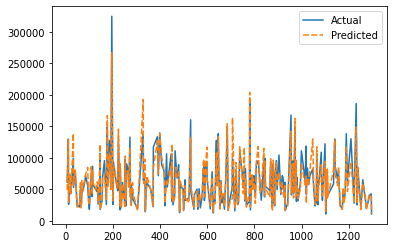

In [149]:
sns.lineplot(diff)

In [150]:
r2_score(y_test,y_pred)

0.8672094713391838

In [151]:
from joblib import dump, load


In [152]:
dump(pipe, 'laptop.pkl')

['laptop.pkl']

In [153]:
data

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Size_Flash Storage,Size_HDD,Size_Hybrid,Size_SSD,ppi
0,Apple,Ultrabook,13.3,Intel Core i5,8,Intel,macOS,1.37,0,0,0,128,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5,8,Intel,macOS,1.34,128,0,0,0,127.677940
2,HP,Notebook,15.6,Intel Core i5,8,Intel,No OS,1.86,0,0,0,256,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7,16,AMD,macOS,1.83,0,0,0,512,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5,8,Intel,macOS,1.37,0,0,0,256,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7,4,Intel,Windows 10,1.80,0,0,0,128,157.350512
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7,16,Intel,Windows 10,1.30,0,0,0,512,276.053530
1300,Lenovo,Notebook,14.0,Others,2,Intel,Windows 10,1.50,64,0,0,0,111.935204
1301,HP,Notebook,15.6,Intel Core i7,6,AMD,Windows 10,2.19,0,1,0,0,100.454670


In [154]:
data.to_csv('laptop.csv')

In [158]:
type(pipe)

sklearn.pipeline.Pipeline

In [159]:
import pickle


In [161]:
pickle.dump(pipe,open('LAPTOP.pkl','wb'))
